<a href="https://colab.research.google.com/github/hhkbhamza/CreditcardFraudDetection/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("fraudTrain.csv")

In [ ]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105010,105010,2019-03-02 09:36:18,36078114201167,fraud_Kilback LLC,grocery_pos,125.09,Christopher,Horn,M,956 Sanchez Highway,...,37.2692,-82.9161,798,Facilities manager,1926-06-26,b2551fc8afb405cc8b54d2e85b6d87a8,1.330681e+09,37.713488,-83.519254,0.0
105011,105011,2019-03-02 09:37:04,6526448584969862,fraud_Deckow-O'Conner,grocery_pos,98.60,Nathan,Stewart,M,63502 Brown Road Apt. 318,...,40.2878,-74.0162,8097,Mechanical engineer,1964-02-18,2cc46c950f39547d6aa1af64ed175153,1.330681e+09,39.449230,-73.249545,0.0
105012,105012,2019-03-02 09:38:20,4640395708703,"fraud_Reilly, Heaney and Cole",gas_transport,61.61,Melissa,Krause,F,67632 Martin Gateway,...,30.6576,-91.6264,1178,Community education officer,1951-06-13,a229f52e5061dec15ed05b193a2cb7ef,1.330681e+09,29.777563,-91.693122,0.0
105013,105013,2019-03-02 09:38:30,2576709887791552,fraud_Koss and Sons,gas_transport,64.62,Joseph,Morgan,M,126 Underwood Drive,...,33.0067,-117.0690,1241364,Chartered public finance accountant,1959-08-05,70a3bcad23892e8e27530f986f7b39e9,1.330681e+09,32.859934,-117.419411,0.0


In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,105015.000000,1.050150e+05,105015.000000,105015.000000,105015.000000,105015.000000,1.050150e+05,1.050140e+05,105014.000000,105014.000000,105014.000000
mean,52507.000000,4.172758e+17,71.940861,48715.773223,38.540395,-90.182748,8.901725e+04,1.328043e+09,38.541580,-90.183703,0.009808
std,30315.363597,1.308384e+18,145.667653,26902.634074,5.075934,13.781542,3.011395e+05,1.532316e+06,5.108967,13.793261,0.098550
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.670132,0.000000
25%,26253.500000,1.800365e+14,9.710000,26041.000000,34.668900,-96.790900,7.430000e+02,1.326665e+09,34.757810,-96.874255,0.000000
50%,52507.000000,3.519607e+15,48.200000,48154.000000,39.354300,-87.458100,2.456000e+03,1.328054e+09,39.367387,-87.393430,0.000000
75%,78760.500000,4.642255e+15,83.920000,72011.000000,41.894800,-80.128400,2.047800e+04,1.329400e+09,41.942538,-80.178808,0.000000
max,105014.000000,4.992346e+18,12788.070000,99783.000000,65.689900,-67.950300,2.906700e+06,1.330681e+09,66.659242,-66.967742,1.000000


In [ ]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of credit card fraud')

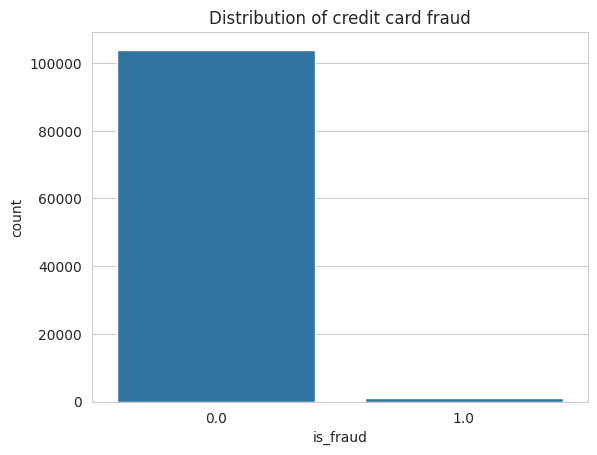

In [ ]:
sns.countplot(x="is_fraud", data=df)
plt.title("Distribution of credit card fraud")

Text(0.5, 1.0, 'Amt distribution by is_fraud')

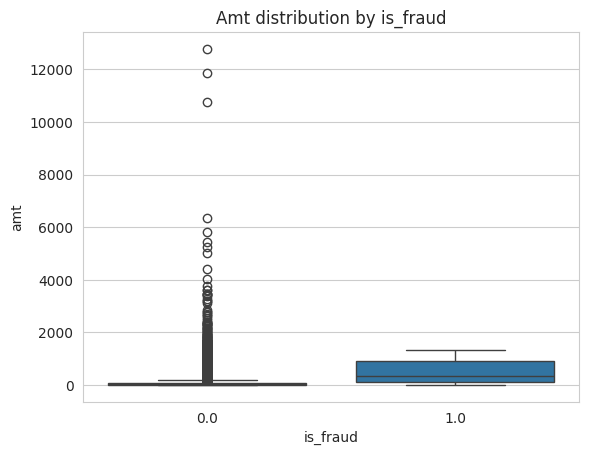

In [ ]:
sns.boxplot(x="is_fraud", y="amt", data=df)
plt.title("Amt distribution by is_fraud")

In [ ]:
features = df.drop('is_fraud', axis=1)

In [ ]:
features

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105010,105010,2019-03-02 09:36:18,36078114201167,fraud_Kilback LLC,grocery_pos,125.09,Christopher,Horn,M,956 Sanchez Highway,...,41836,37.2692,-82.9161,798,Facilities manager,1926-06-26,b2551fc8afb405cc8b54d2e85b6d87a8,1.330681e+09,37.713488,-83.519254
105011,105011,2019-03-02 09:37:04,6526448584969862,fraud_Deckow-O'Conner,grocery_pos,98.60,Nathan,Stewart,M,63502 Brown Road Apt. 318,...,7764,40.2878,-74.0162,8097,Mechanical engineer,1964-02-18,2cc46c950f39547d6aa1af64ed175153,1.330681e+09,39.449230,-73.249545
105012,105012,2019-03-02 09:38:20,4640395708703,"fraud_Reilly, Heaney and Cole",gas_transport,61.61,Melissa,Krause,F,67632 Martin Gateway,...,70732,30.6576,-91.6264,1178,Community education officer,1951-06-13,a229f52e5061dec15ed05b193a2cb7ef,1.330681e+09,29.777563,-91.693122
105013,105013,2019-03-02 09:38:30,2576709887791552,fraud_Koss and Sons,gas_transport,64.62,Joseph,Morgan,M,126 Underwood Drive,...,92128,33.0067,-117.0690,1241364,Chartered public finance accountant,1959-08-05,70a3bcad23892e8e27530f986f7b39e9,1.330681e+09,32.859934,-117.419411


In [ ]:
target = df['is_fraud']

In [ ]:
target

,is_fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
105010,0.0
105011,0.0
105012,0.0
105013,0.0


In [ ]:
features = features.drop(["cc_num", "first", "last", "gender", "street", "zip", "lat", "long", "job", "dob"], axis=1)

In [ ]:
features

,Unnamed: 0,trans_date_trans_time,merchant,category,amt,city,state,city_pop,trans_num,unix_time,merch_lat,merch_long
0,0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,Moravian Falls,NC,3495,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315
1,1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,149,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462
2,2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,Malad City,ID,4154,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481
3,3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Boulder,MT,1939,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071
4,4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,Doe Hill,VA,99,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...,...
105010,105010,2019-03-02 09:36:18,fraud_Kilback LLC,grocery_pos,125.09,Mallie,KY,798,b2551fc8afb405cc8b54d2e85b6d87a8,1.330681e+09,37.713488,-83.519254
105011,105011,2019-03-02 09:37:04,fraud_Deckow-O'Conner,grocery_pos,98.60,West Long Branch,NJ,8097,2cc46c950f39547d6aa1af64ed175153,1.330681e+09,39.449230,-73.249545
105012,105012,2019-03-02 09:38:20,"fraud_Reilly, Heaney and Cole",gas_transport,61.61,Fordoche,LA,1178,a229f52e5061dec15ed05b193a2cb7ef,1.330681e+09,29.777563,-91.693122
105013,105013,2019-03-02 09:38:30,fraud_Koss and Sons,gas_transport,64.62,San Diego,CA,1241364,70a3bcad23892e8e27530f986f7b39e9,1.330681e+09,32.859934,-117.419411


In [ ]:
features = features.drop(["unix_time", "trans_num"], axis=1)

In [ ]:
features = features.drop(["merchant", "city"], axis=1)

In [ ]:
features

,Unnamed: 0,trans_date_trans_time,category,amt,state,city_pop,merch_lat,merch_long
0,0,2019-01-01 00:00:18,misc_net,4.97,NC,3495,36.011293,-82.048315
1,1,2019-01-01 00:00:44,grocery_pos,107.23,WA,149,49.159047,-118.186462
2,2,2019-01-01 00:00:51,entertainment,220.11,ID,4154,43.150704,-112.154481
3,3,2019-01-01 00:01:16,gas_transport,45.00,MT,1939,47.034331,-112.561071
4,4,2019-01-01 00:03:06,misc_pos,41.96,VA,99,38.674999,-78.632459
...,...,...,...,...,...,...,...,...
105010,105010,2019-03-02 09:36:18,grocery_pos,125.09,KY,798,37.713488,-83.519254
105011,105011,2019-03-02 09:37:04,grocery_pos,98.60,NJ,8097,39.449230,-73.249545
105012,105012,2019-03-02 09:38:20,gas_transport,61.61,LA,1178,29.777563,-91.693122
105013,105013,2019-03-02 09:38:30,gas_transport,64.62,CA,1241364,32.859934,-117.419411


In [ ]:
features = pd.get_dummies(features, columns=["category", "state"])

In [ ]:
features

,Unnamed: 0,trans_date_trans_time,amt,city_pop,merch_lat,merch_long,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,2019-01-01 00:00:18,4.97,3495,36.011293,-82.048315,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,2019-01-01 00:00:44,107.23,149,49.159047,-118.186462,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2,2019-01-01 00:00:51,220.11,4154,43.150704,-112.154481,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,2019-01-01 00:01:16,45.00,1939,47.034331,-112.561071,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,4,2019-01-01 00:03:06,41.96,99,38.674999,-78.632459,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105010,105010,2019-03-02 09:36:18,125.09,798,37.713488,-83.519254,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105011,105011,2019-03-02 09:37:04,98.60,8097,39.449230,-73.249545,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105012,105012,2019-03-02 09:38:20,61.61,1178,29.777563,-91.693122,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
105013,105013,2019-03-02 09:38:30,64.62,1241364,32.859934,-117.419411,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
features = features.drop(columns=['Unnamed: 0'])

In [ ]:
features


,trans_date_trans_time,amt,city_pop,merch_lat,merch_long,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,2019-01-01 00:00:18,4.97,3495,36.011293,-82.048315,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2019-01-01 00:00:44,107.23,149,49.159047,-118.186462,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,2019-01-01 00:00:51,220.11,4154,43.150704,-112.154481,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2019-01-01 00:01:16,45.00,1939,47.034331,-112.561071,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2019-01-01 00:03:06,41.96,99,38.674999,-78.632459,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105010,2019-03-02 09:36:18,125.09,798,37.713488,-83.519254,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
105011,2019-03-02 09:37:04,98.60,8097,39.449230,-73.249545,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
105012,2019-03-02 09:38:20,61.61,1178,29.777563,-91.693122,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
105013,2019-03-02 09:38:30,64.62,1241364,32.859934,-117.419411,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
non_nan_indices = target.dropna().index
features = features.loc[non_nan_indices]
target = target.dropna()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=features.columns)

In [ ]:
X_train = X_train.drop(columns=['trans_date_trans_time'])
X_test = X_test.drop(columns=['trans_date_trans_time'])

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train[0]

array([-0.44861017, -0.27346238,  0.52303908,  1.05724894, -0.27894494,
       -0.27605915, -0.33879323, -0.19133673, -0.32533738, -0.26742141,
       -0.32064074, -0.3062108 , -0.22795896, -0.25499249, -0.27535934,
       -0.28553262,  3.17771717, -0.17853107, -0.04243371, -0.18191067,
       -0.15723974, -0.09407604, -0.20853125, -0.10318182, -0.07899537,
       -0.05709789, -0.18523639, -0.14258709, -0.04436095, -0.14362652,
       -0.06785154, -0.19016378, -0.1453437 , -0.13418891, -0.14738008,
       -0.12653928, -0.09718167, -0.14336731, -0.11271813, -0.19419298,
       -0.15688167, -0.17674848, -0.12837184, -0.09848377, -0.15540174,
       -0.10626041, -0.13799972, -0.07792025, -0.14136554, -0.11713079,
       -0.06355734, -0.26537143, -0.18965917, -0.14297769, -0.1215933 ,
        3.88908113, -0.02155088, -0.14980687, -0.09433326, -0.11639761,
       -0.28168659, -0.08993133, -0.15431369, -0.09362427, -0.12244736,
       -0.14918271, -0.14457329, -0.1195611 ])

In [ ]:
X_train[1]

array([-0.46682189, -0.2926205 ,  1.78537688, -0.53856528,  3.58493688,
       -0.27605915, -0.33879323, -0.19133673, -0.32533738, -0.26742141,
       -0.32064074, -0.3062108 , -0.22795896, -0.25499249, -0.27535934,
       -0.28553262, -0.31469132, -0.17853107, -0.04243371, -0.18191067,
       -0.15723974, -0.09407604, -0.20853125, -0.10318182, -0.07899537,
       -0.05709789, -0.18523639, -0.14258709, -0.04436095, -0.14362652,
       -0.06785154, -0.19016378, -0.1453437 , -0.13418891, -0.14738008,
       -0.12653928, -0.09718167, -0.14336731, -0.11271813, -0.19419298,
       -0.15688167, -0.17674848, -0.12837184, -0.09848377, -0.15540174,
        9.410843  , -0.13799972, -0.07792025, -0.14136554, -0.11713079,
       -0.06355734, -0.26537143, -0.18965917, -0.14297769, -0.1215933 ,
       -0.25713015, -0.02155088, -0.14980687, -0.09433326, -0.11639761,
       -0.28168659, -0.08993133, -0.15431369, -0.09362427, -0.12244736,
       -0.14918271, -0.14457329, -0.1195611 ])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
lr_model = LogisticRegression(random_state=42)

In [ ]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
lr_predictions = lr_model.predict(X_test)

In [ ]:
lr_predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [ ]:
lr_accuracy

0.9913821834975955

In [ ]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
  print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
  print("----------")

  with open(filename, "wb") as file:
    pickle.dump(model, file)

  print(f"Model saved as {filename}")

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "xgb_model.pkl")

dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test, "dt_model.pkl")

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, "rf_model.pkl")

In [ ]:
feature_importances = xgb_model.feature_importances_
feature_names = features.columns

In [ ]:
feature_importances

In [ ]:
feature_names

In [ ]:
# Adjust feature_names to match the length of feature_importances
feature_names = feature_names[:-1]  # Drop the last feature name

# Now create the DataFrame
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})


In [ ]:
feature_importances_df

In [ ]:
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

In [ ]:
feature_importances_df

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['feature'], feature_importances_df['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
evaluate_and_save_model(xgb_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('xgboost', xgb.XGBClassifier(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ],
    voting='soft'
)


In [ ]:
evaluate_and_save_model(voting_clf, X_resampled, X_test, y_resampled, y_test, 'voting_clf.pkl')

In [ ]:
feature_template = pd.DataFrame(columns=X_train.columns)
feature_template.to_pickle("features_template.pkl")